# Export Capstone Project: Exploratory Data Analysis
#### Josh Barker
#### DTSC 691: Data Science Capstone: Applied Data Science
#### Eastern University
#### Spring 2025

## Exploratory Data Analysis Notebook Overview
We have already pulled together data from a variety of different sources and cleaned it, creating two dataframes. One has all our features with fewer rows and the other has fewer features and more rows.

In this notebook, we will:
* Import the `cleaned_metro_exports.csv` file and `cleaned_metro_exports_all_features.csv` from the Data Cleaning and Preparation Notebook.
* Get a good understanding of the data
* Review the correlation matrix
* Graph interesting correlations
* Identify which dataset and features to use for model training

### Import Necessary Libraries
Below are all the libraries needed to run this notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, f_oneway

Below is the data needed to run this notebook:

In [2]:
metro_exports_all_rows = pd.read_csv("cleaned_metro_exports.csv")
metro_exports_all_features = pd.read_csv("cleaned_metro_exports_all_features.csv")

## Exploratory Analysis
### All Rows Dataset
Let's start with a histogram of our features.

We can see that 

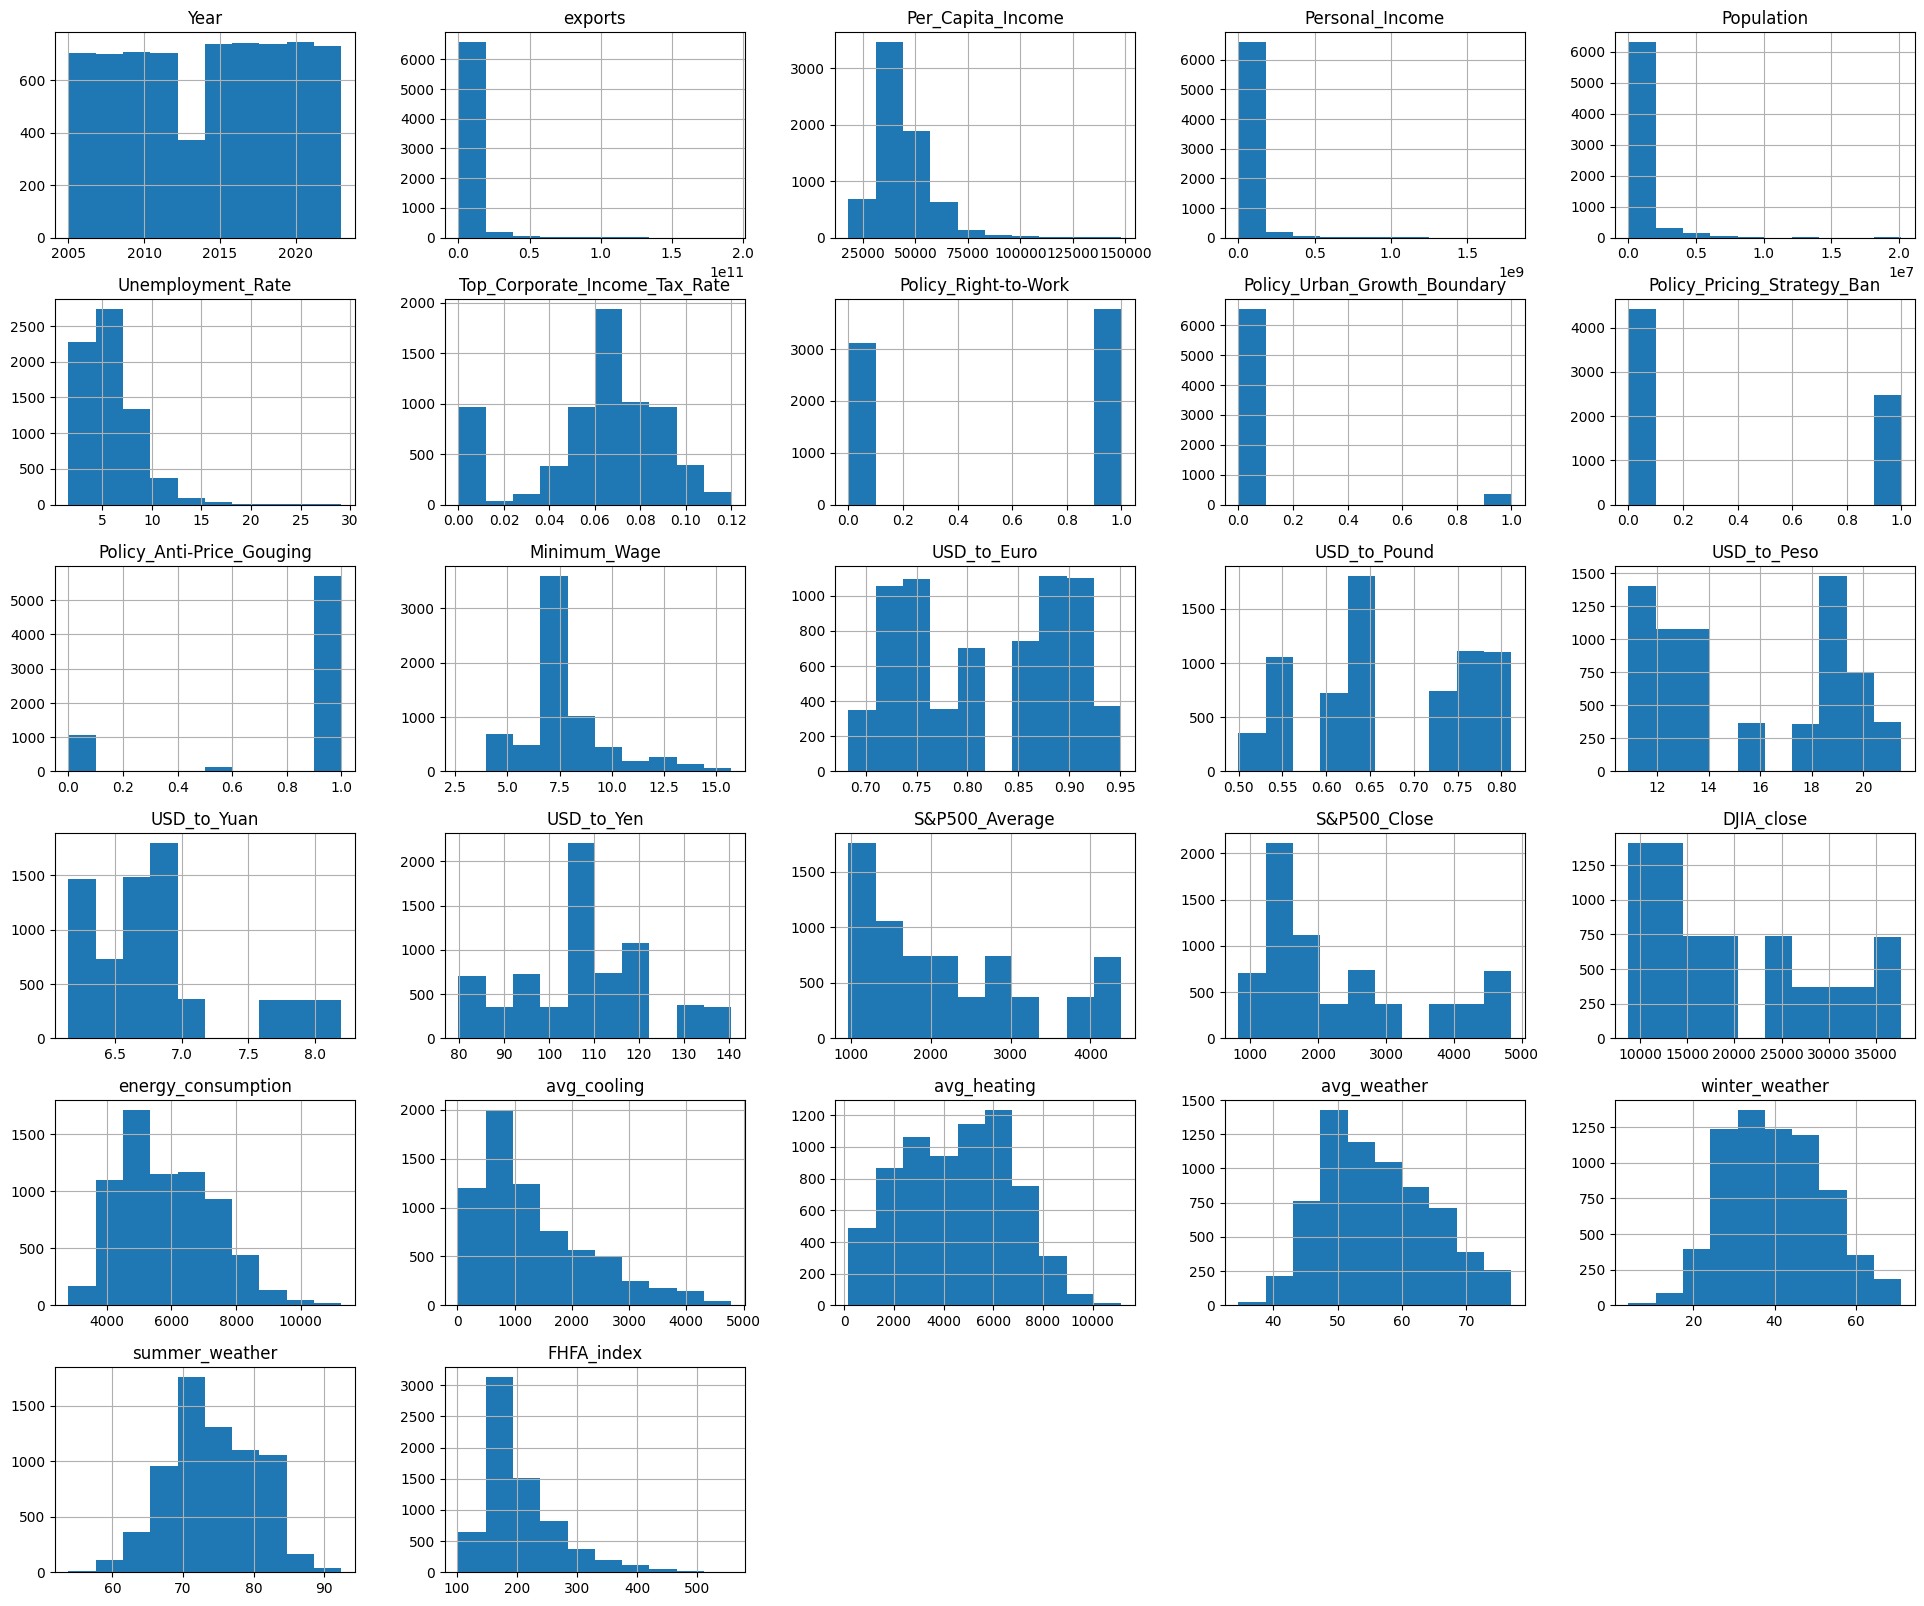

In [3]:
metro_exports_all_rows.hist(figsize = (24,20))
plt.show()

In [4]:
bin_count = 100
rows_exports_min = (metro_exports_all_rows["exports"].min().item())
rows_exports_max = (metro_exports_all_rows["exports"].max().item())
step = (rows_exports_max - rows_exports_min)/bin_count

In [5]:
bins = list(np.arange(rows_exports_min, rows_exports_max, step))
#bins

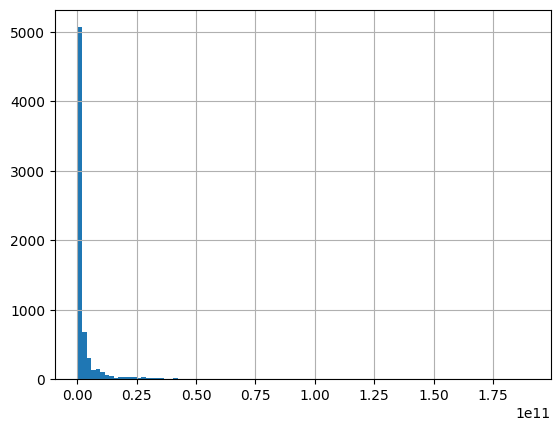

In [6]:
metro_exports_all_rows["exports"].hist(bins = bins)
plt.show()

We can see that the exports--our predicted variable--is right-tailed, with many of the MSAs having low levels of exports. This is also tied to the MSAs population, which is also right-tailed. Let's get the skewness and kurtosis metrics for exports.

In [7]:
skew(metro_exports_all_rows["exports"])

np.float64(7.155917427032765)

In [8]:
kurtosis(metro_exports_all_rows["exports"])

np.float64(71.33541448180662)

We can see that the data is highly skewed based on the very high skewness of 7; however, the kurtosis of 71 indicates the right tail is also fairly heavy. We wouldn't want to simply exclude values outside of the lower range. 

While skew may not be a problem for some models, it can lead to bias for linear regression coefficient estimates and predictions. For this reason, it is worthwhile to look at how a log-transformation might impact the data.

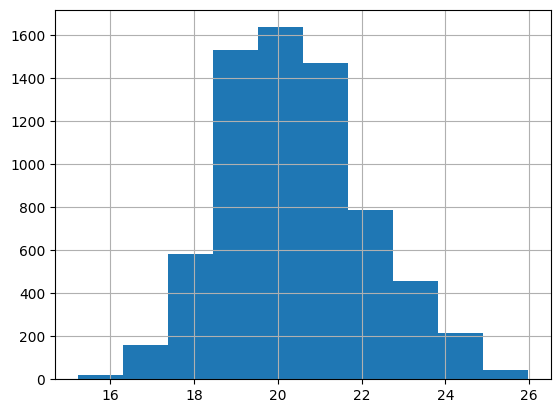

In [43]:
np.log(metro_exports_all_rows["exports"]).hist()
plt.show()

We can see that applying a log-transformation to the exports variable brings it much closer to a normal distribution, which can be helpful in addressing some of the problems we would face with a skewed ouptut variable. 

In [10]:
metro_exports_all_rows["log_exports"] = np.log(metro_exports_all_rows["exports"])
#metro_exports_all_rows = metro_exports_all_rows.drop("log_exports", axis = 1)

The histogram of `Year` appears to have an unexpected sharp decrease in the mid-2010s. In examining this closer, we find that this is due to the bin size automatically set and that, when we give each year its own bin, we find, as the value counts suggest, a dump beginning at 2013, but no sharp decline.

In [11]:
metro_exports_all_rows["Year"].value_counts().sort_index()

Year
2005    352
2006    351
2007    351
2008    351
2009    353
2010    354
2011    352
2012    353
2013    372
2014    370
2015    370
2016    371
2017    371
2018    370
2019    369
2020    372
2021    374
2022    372
2023    359
Name: count, dtype: int64

<Axes: >

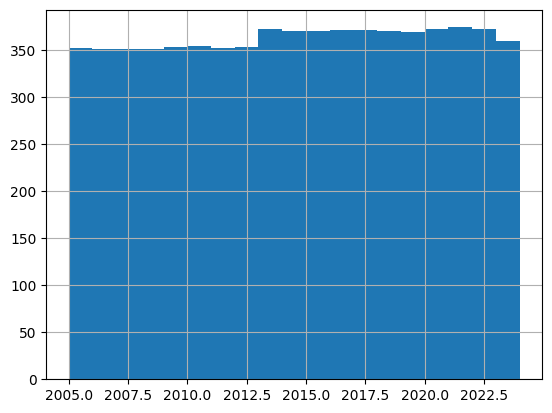

In [12]:
bins = list(range(2005, 2025, 1))
metro_exports_all_rows["Year"].hist(bins = bins)

Let's examine the general export trends over time. In the first graph, I include all metro areas. In the second graph, we zoom in to get a sense of the mid-level exporters. The third graph zooms in further to the lowest level of exporters. The largest exporters appear to have a positive upward trend over time. The mid-level exporters seem the most unstable, but generally a positive trajectory. The smallest exporters appear to remain more constant.

In [13]:
year_ticks = [2005, 2008, 2011, 2014, 2017, 2020, 2023]

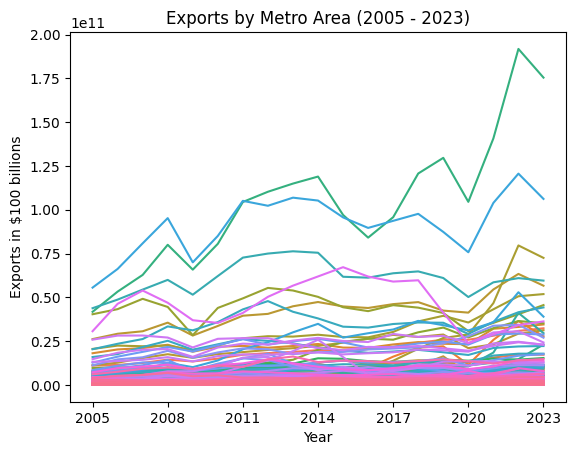

In [14]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "exports", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Exports by Metro Area (2005 - 2023)", ylabel = "Exports in $100 billions", xticks = year_ticks)
plt.show()

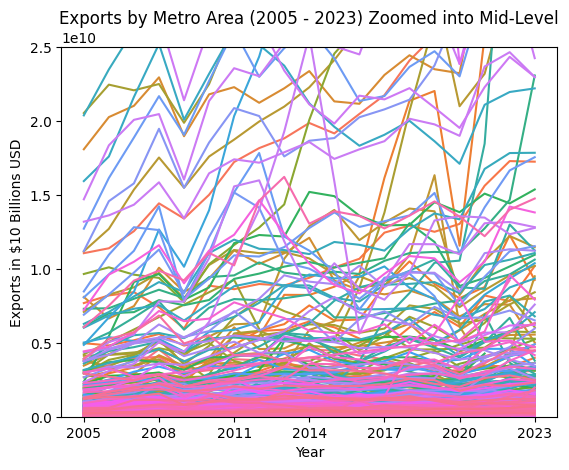

In [15]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "exports", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Exports by Metro Area (2005 - 2023) Zoomed into Mid-Level", ylabel = "Exports in $10 Billions USD", 
       xticks = year_ticks, ylim = (0,25000000000))
plt.show()

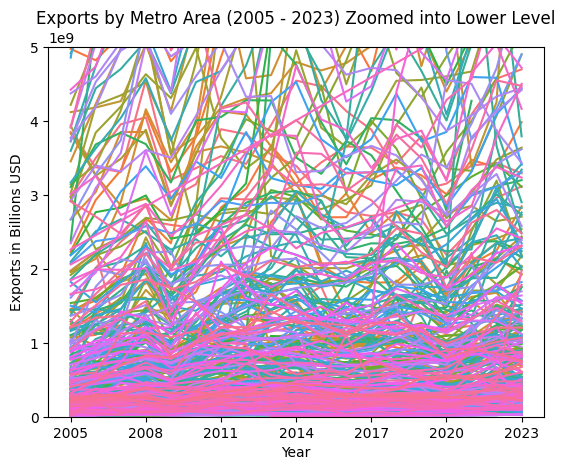

In [16]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "exports", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Exports by Metro Area (2005 - 2023) Zoomed into Lower Level", ylabel = "Exports in Billions USD", xticks = year_ticks, ylim = (0,5000000000))
plt.show()

Let's examine the exchange rates. The Pound and Euro both appear to be generally stable throughout the time period, while the Peso is generally positive, Yuan is generally negative, and Yen varies a lot, but generally tends positive.

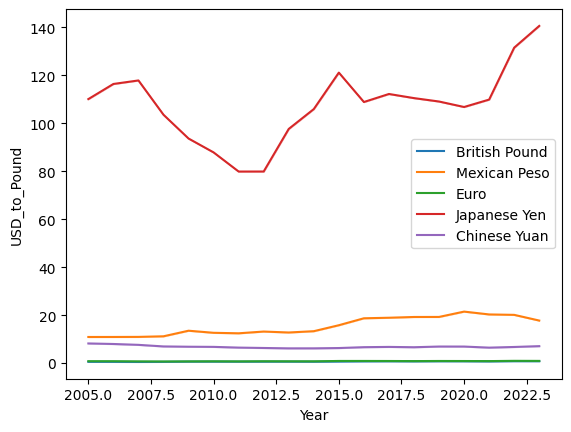

In [17]:
sns.lineplot(x="Year", y="USD_to_Pound", data = metro_exports_all_rows, label = "British Pound")
sns.lineplot(x="Year", y="USD_to_Peso", data = metro_exports_all_rows, label = "Mexican Peso")
sns.lineplot(x="Year", y="USD_to_Euro", data = metro_exports_all_rows, label = "Euro")
sns.lineplot(x="Year", y="USD_to_Yen", data = metro_exports_all_rows, label = "Japanese Yen")
sns.lineplot(x="Year", y="USD_to_Yuan", data = metro_exports_all_rows, label = "Chinese Yuan")
plt.show()

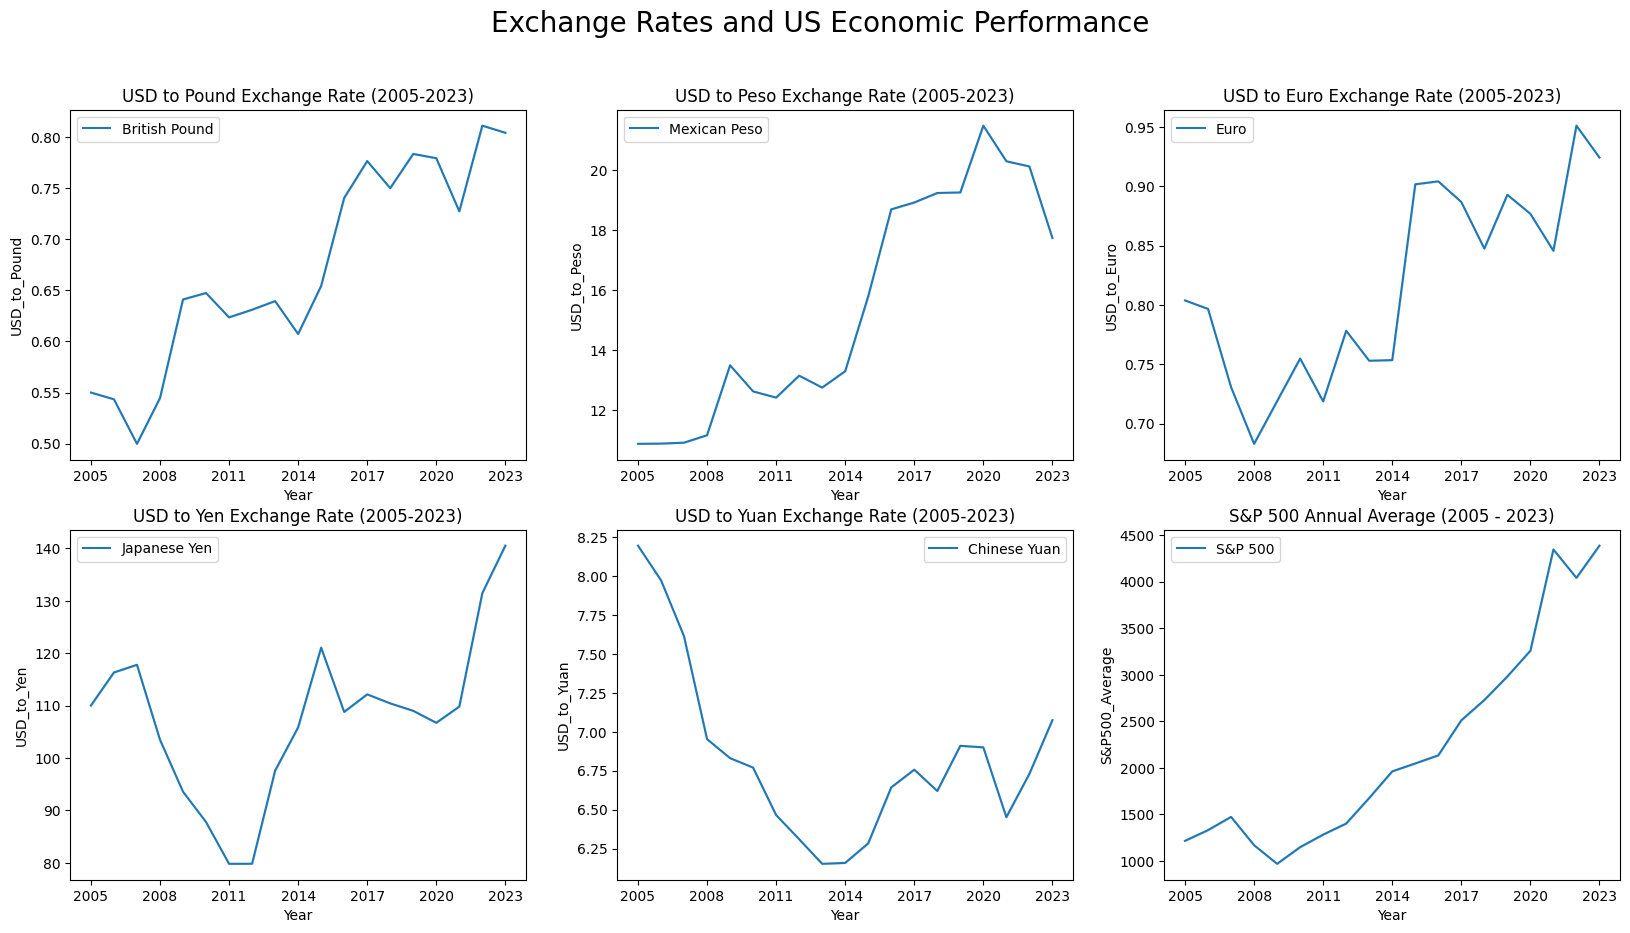

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.lineplot(x="Year", y="USD_to_Pound", data = metro_exports_all_rows, label = "British Pound", ax = ax[0, 0])
ax[0, 0].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "USD to Pound Exchange Rate (2005-2023)")
sns.lineplot(x="Year", y="USD_to_Peso", data = metro_exports_all_rows, label = "Mexican Peso", ax = ax[0, 1])
ax[0, 1].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "USD to Peso Exchange Rate (2005-2023)")
sns.lineplot(x="Year", y="USD_to_Euro", data = metro_exports_all_rows, label = "Euro", ax = ax[0, 2])
ax[0, 2].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "USD to Euro Exchange Rate (2005-2023)")
sns.lineplot(x="Year", y="USD_to_Yen", data = metro_exports_all_rows, label = "Japanese Yen", ax = ax[1, 0])
ax[1, 0].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "USD to Yen Exchange Rate (2005-2023)")
sns.lineplot(x="Year", y="USD_to_Yuan", data = metro_exports_all_rows, label = "Chinese Yuan", ax = ax[1, 1])
ax[1, 1].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "USD to Yuan Exchange Rate (2005-2023)")
sns.lineplot(x="Year", y="S&P500_Average", data = metro_exports_all_rows, label = "S&P 500", ax = ax[1, 2])
ax[1, 2].set(xticks=[2005, 2008, 2011, 2014, 2017, 2020, 2023], title = "S&P 500 Annual Average (2005 - 2023)")
fig.suptitle('Exchange Rates and US Economic Performance', fontsize=20)
plt.show()

Let's look at how stable some of our other variables are over time.

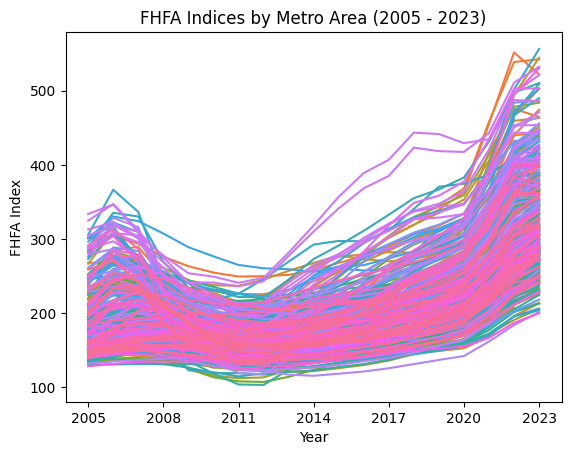

In [19]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "FHFA_index", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "FHFA Indices by Metro Area (2005 - 2023)", ylabel = "FHFA Index", xticks = year_ticks)
plt.show()

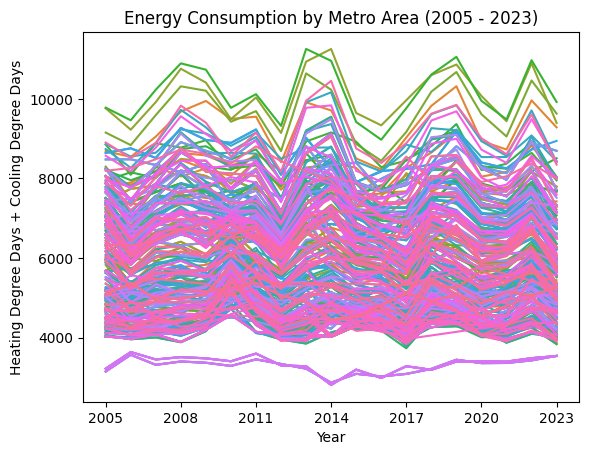

In [20]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "energy_consumption", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Energy Consumption by Metro Area (2005 - 2023)", ylabel = "Heating Degree Days + Cooling Degree Days", xticks = year_ticks)
plt.show()

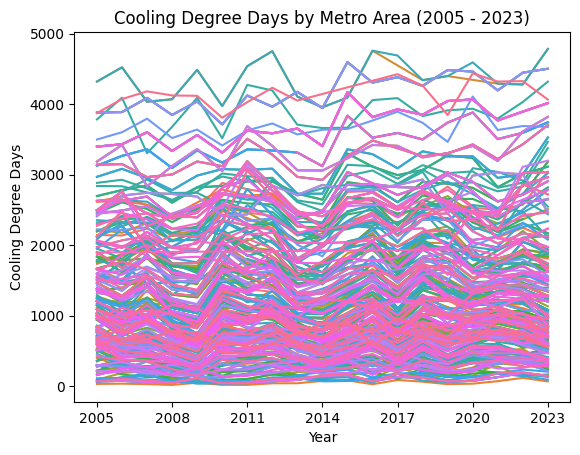

In [21]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "avg_cooling", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Cooling Degree Days by Metro Area (2005 - 2023)", ylabel = "Cooling Degree Days", xticks = year_ticks)
plt.show()

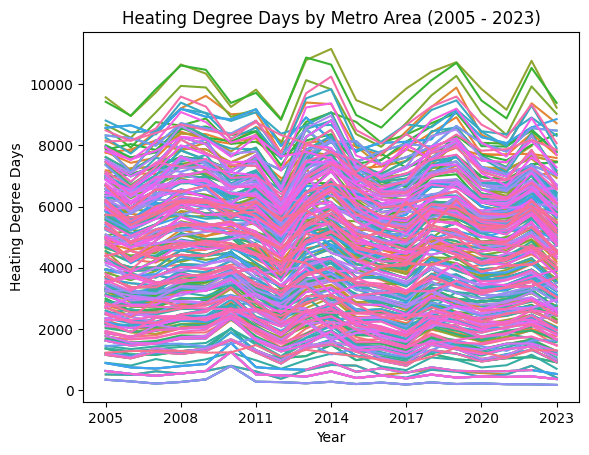

In [22]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "avg_heating", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Heating Degree Days by Metro Area (2005 - 2023)", ylabel = "Heating Degree Days", xticks = year_ticks)
plt.show()

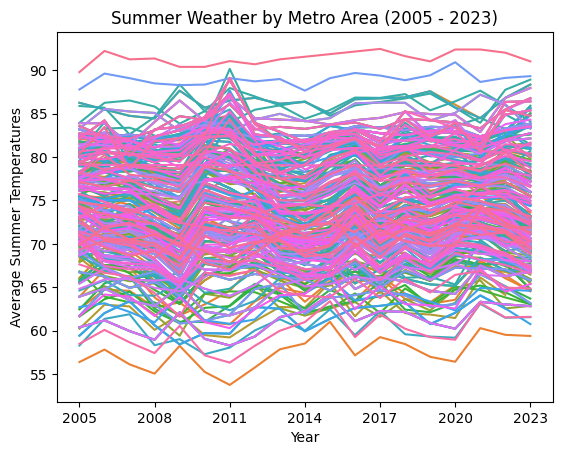

In [23]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "summer_weather", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Summer Weather by Metro Area (2005 - 2023)", ylabel = "Average Summer Temperatures", xticks = year_ticks)
plt.show()

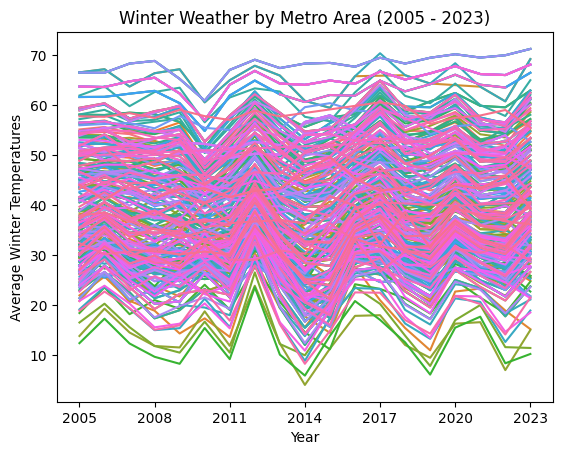

In [24]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "winter_weather", hue = "MSA", data = metro_exports_all_rows, legend = False)
ax.set(title = "Winter Weather by Metro Area (2005 - 2023)", ylabel = "Average Winter Temperatures", xticks = year_ticks)
plt.show()

Let's now consider a cursory glance at correlations between exports and other variables.

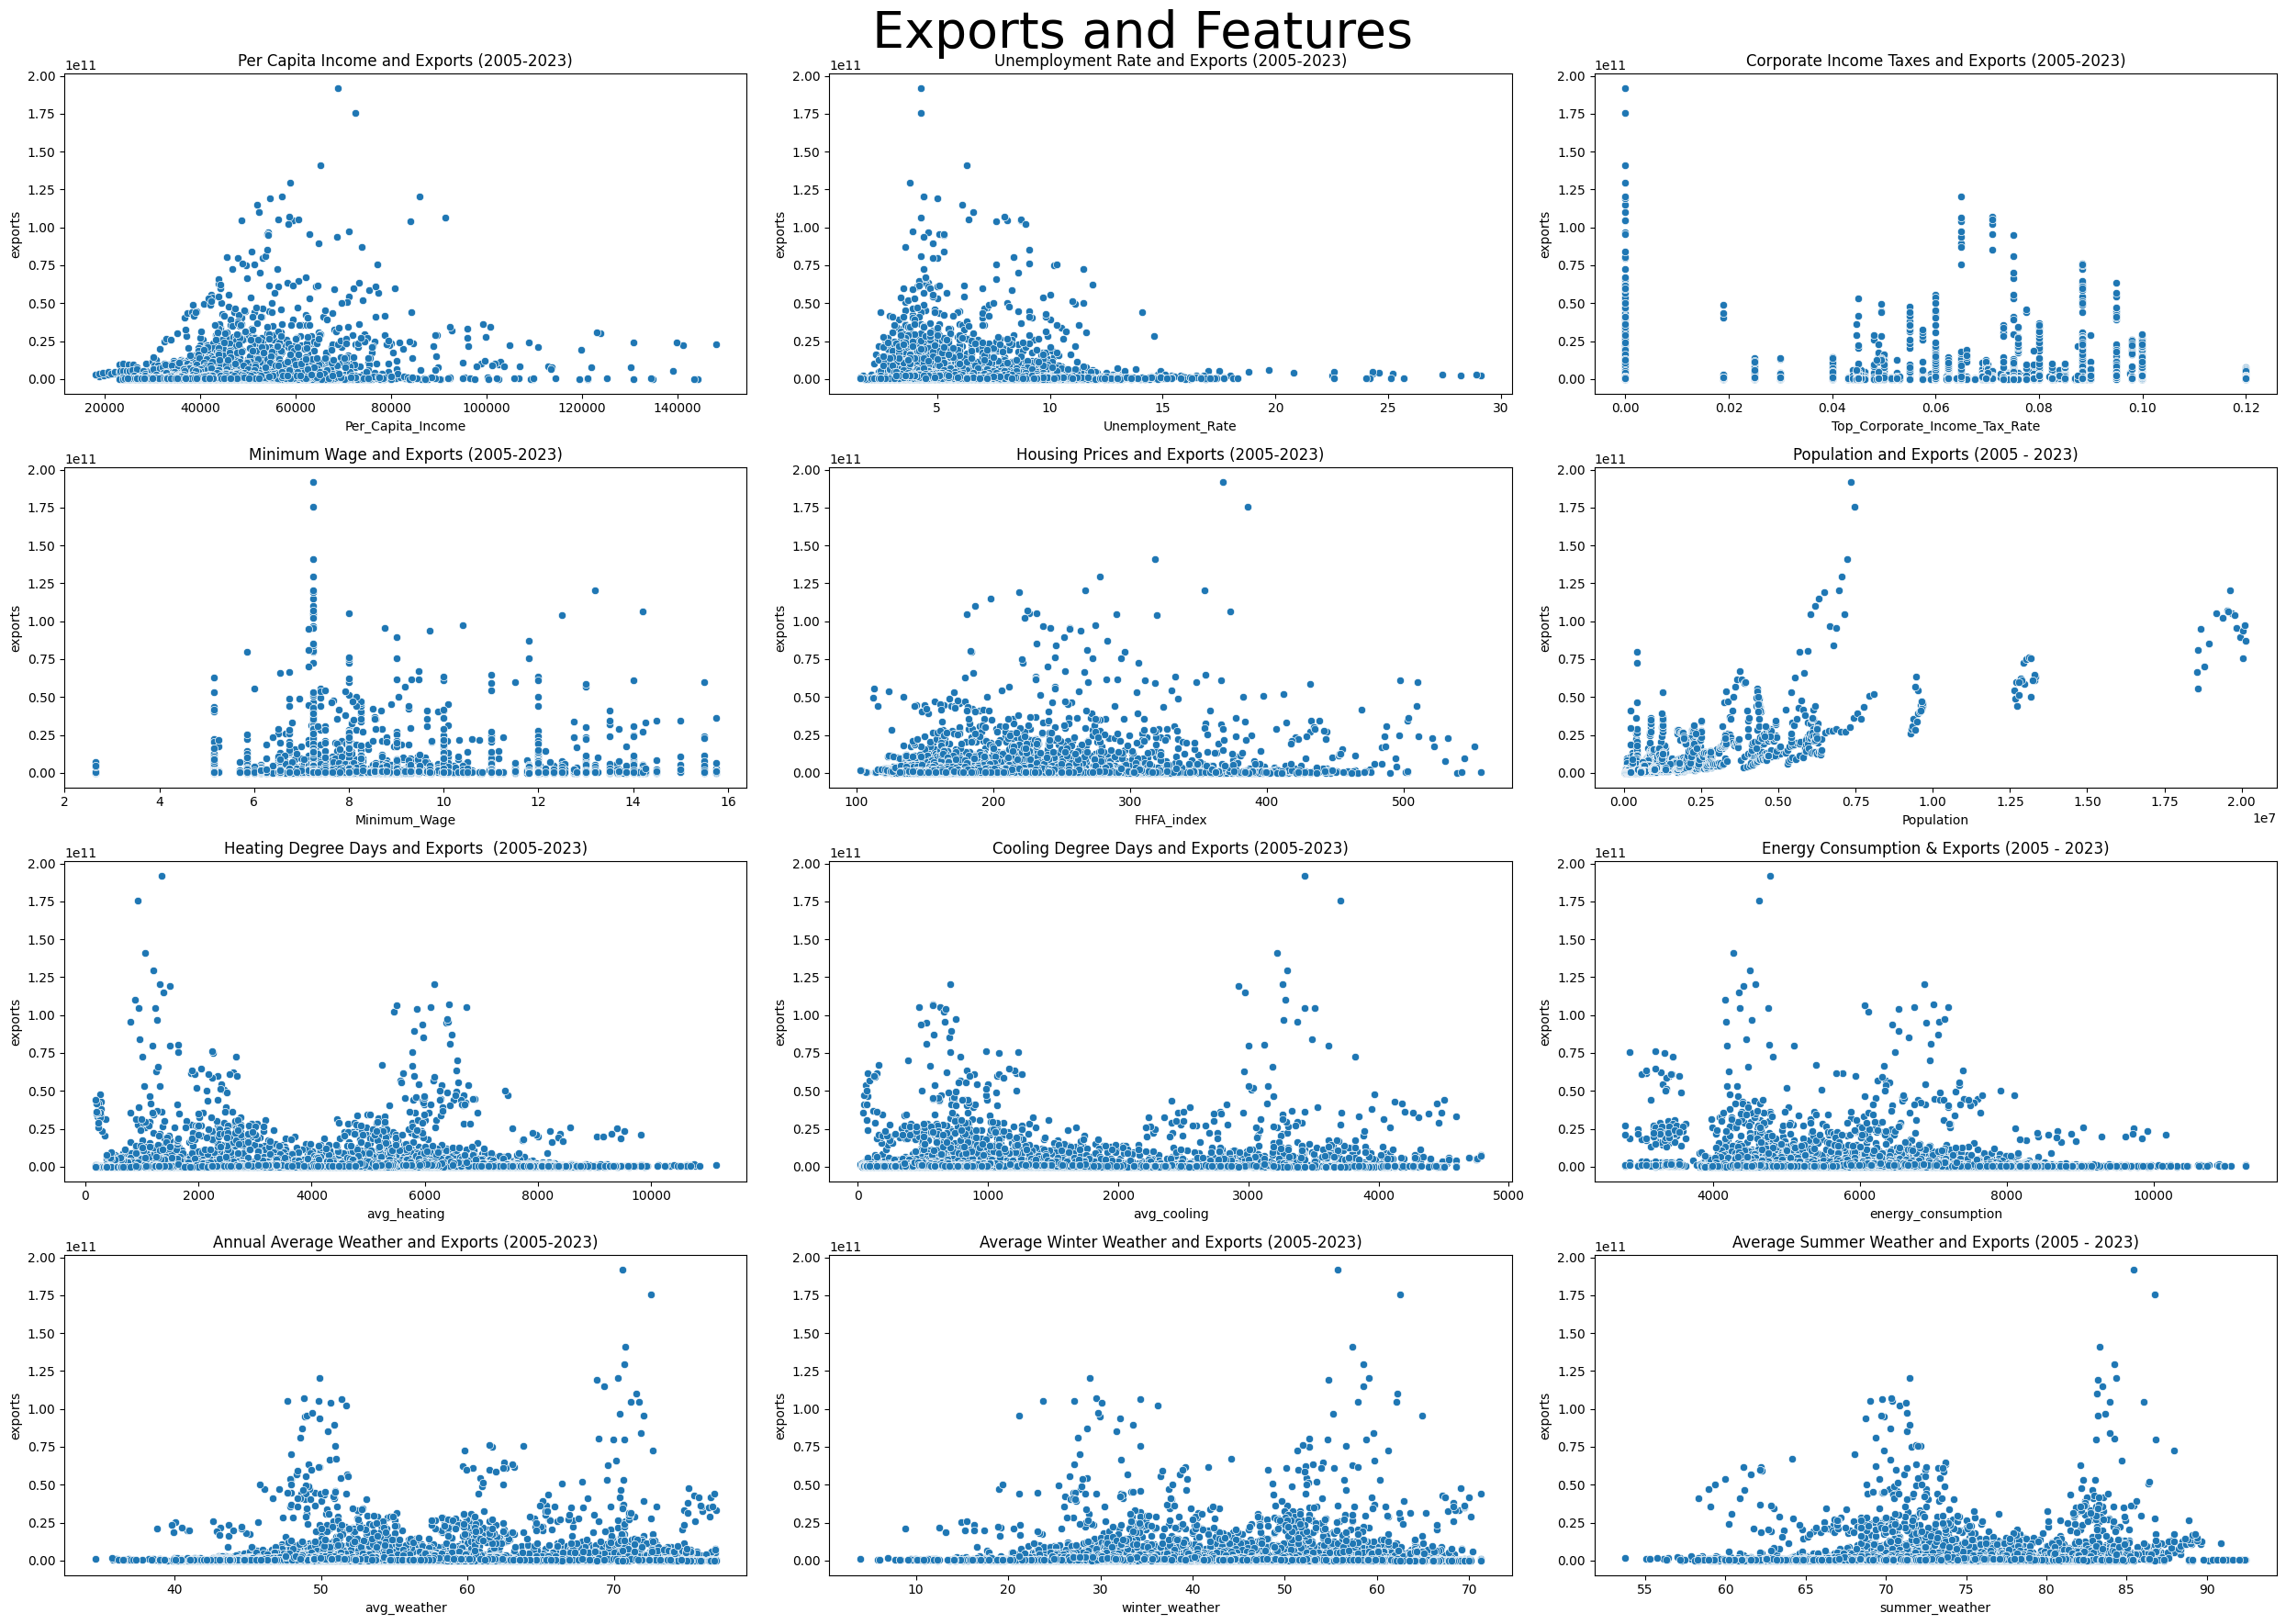

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(25, 18))
sns.scatterplot(x="Per_Capita_Income", y="exports", data = metro_exports_all_rows, ax = ax[0, 0])
ax[0, 0].set(title = "Per Capita Income and Exports (2005-2023)")

sns.scatterplot(x="Unemployment_Rate", y="exports", data = metro_exports_all_rows, ax = ax[0, 1])
ax[0, 1].set(title = "Unemployment Rate and Exports (2005-2023)")

sns.scatterplot(x="Top_Corporate_Income_Tax_Rate", y="exports", data = metro_exports_all_rows, ax = ax[0, 2])
ax[0, 2].set(title = "Corporate Income Taxes and Exports (2005-2023)")

sns.scatterplot(x="Minimum_Wage", y="exports", data = metro_exports_all_rows, ax = ax[1, 0])
ax[1, 0].set(title = "Minimum Wage and Exports (2005-2023)")

sns.scatterplot(x="FHFA_index", y="exports", data = metro_exports_all_rows, ax = ax[1, 1])
ax[1, 1].set(title = "Housing Prices and Exports (2005-2023)")

sns.scatterplot(x="Population", y="exports", data = metro_exports_all_rows, ax = ax[1, 2])
ax[1, 2].set(title = "Population and Exports (2005 - 2023)")

sns.scatterplot(x="avg_heating", y="exports", data = metro_exports_all_rows, ax = ax[2, 0])
ax[2, 0].set(title = "Heating Degree Days and Exports  (2005-2023)")

sns.scatterplot(x="avg_cooling", y="exports", data = metro_exports_all_rows, ax = ax[2, 1])
ax[2, 1].set(title = "Cooling Degree Days and Exports (2005-2023)")

sns.scatterplot(x="energy_consumption", y="exports", data = metro_exports_all_rows, ax = ax[2, 2])
ax[2, 2].set(title = "Energy Consumption & Exports (2005 - 2023)")

sns.scatterplot(x="avg_weather", y="exports", data = metro_exports_all_rows, ax = ax[3, 0])
ax[3, 0].set(title = "Annual Average Weather and Exports (2005-2023)")

sns.scatterplot(x="winter_weather", y="exports", data = metro_exports_all_rows, ax = ax[3, 1])
ax[3, 1].set(title = "Average Winter Weather and Exports (2005-2023)")

sns.scatterplot(x="summer_weather", y="exports", data = metro_exports_all_rows, ax = ax[3, 2])
ax[3, 2].set(title = "Average Summer Weather and Exports (2005 - 2023)")

fig.suptitle('Exports and Features', fontsize=40)
plt.tight_layout()
plt.show()

### All Features Dataset
Before moving on, let's consider how this looks with our alternative dataset and explore the additional manufacturing employment variable. At first glance, it does not appear to change any of the trends identified.

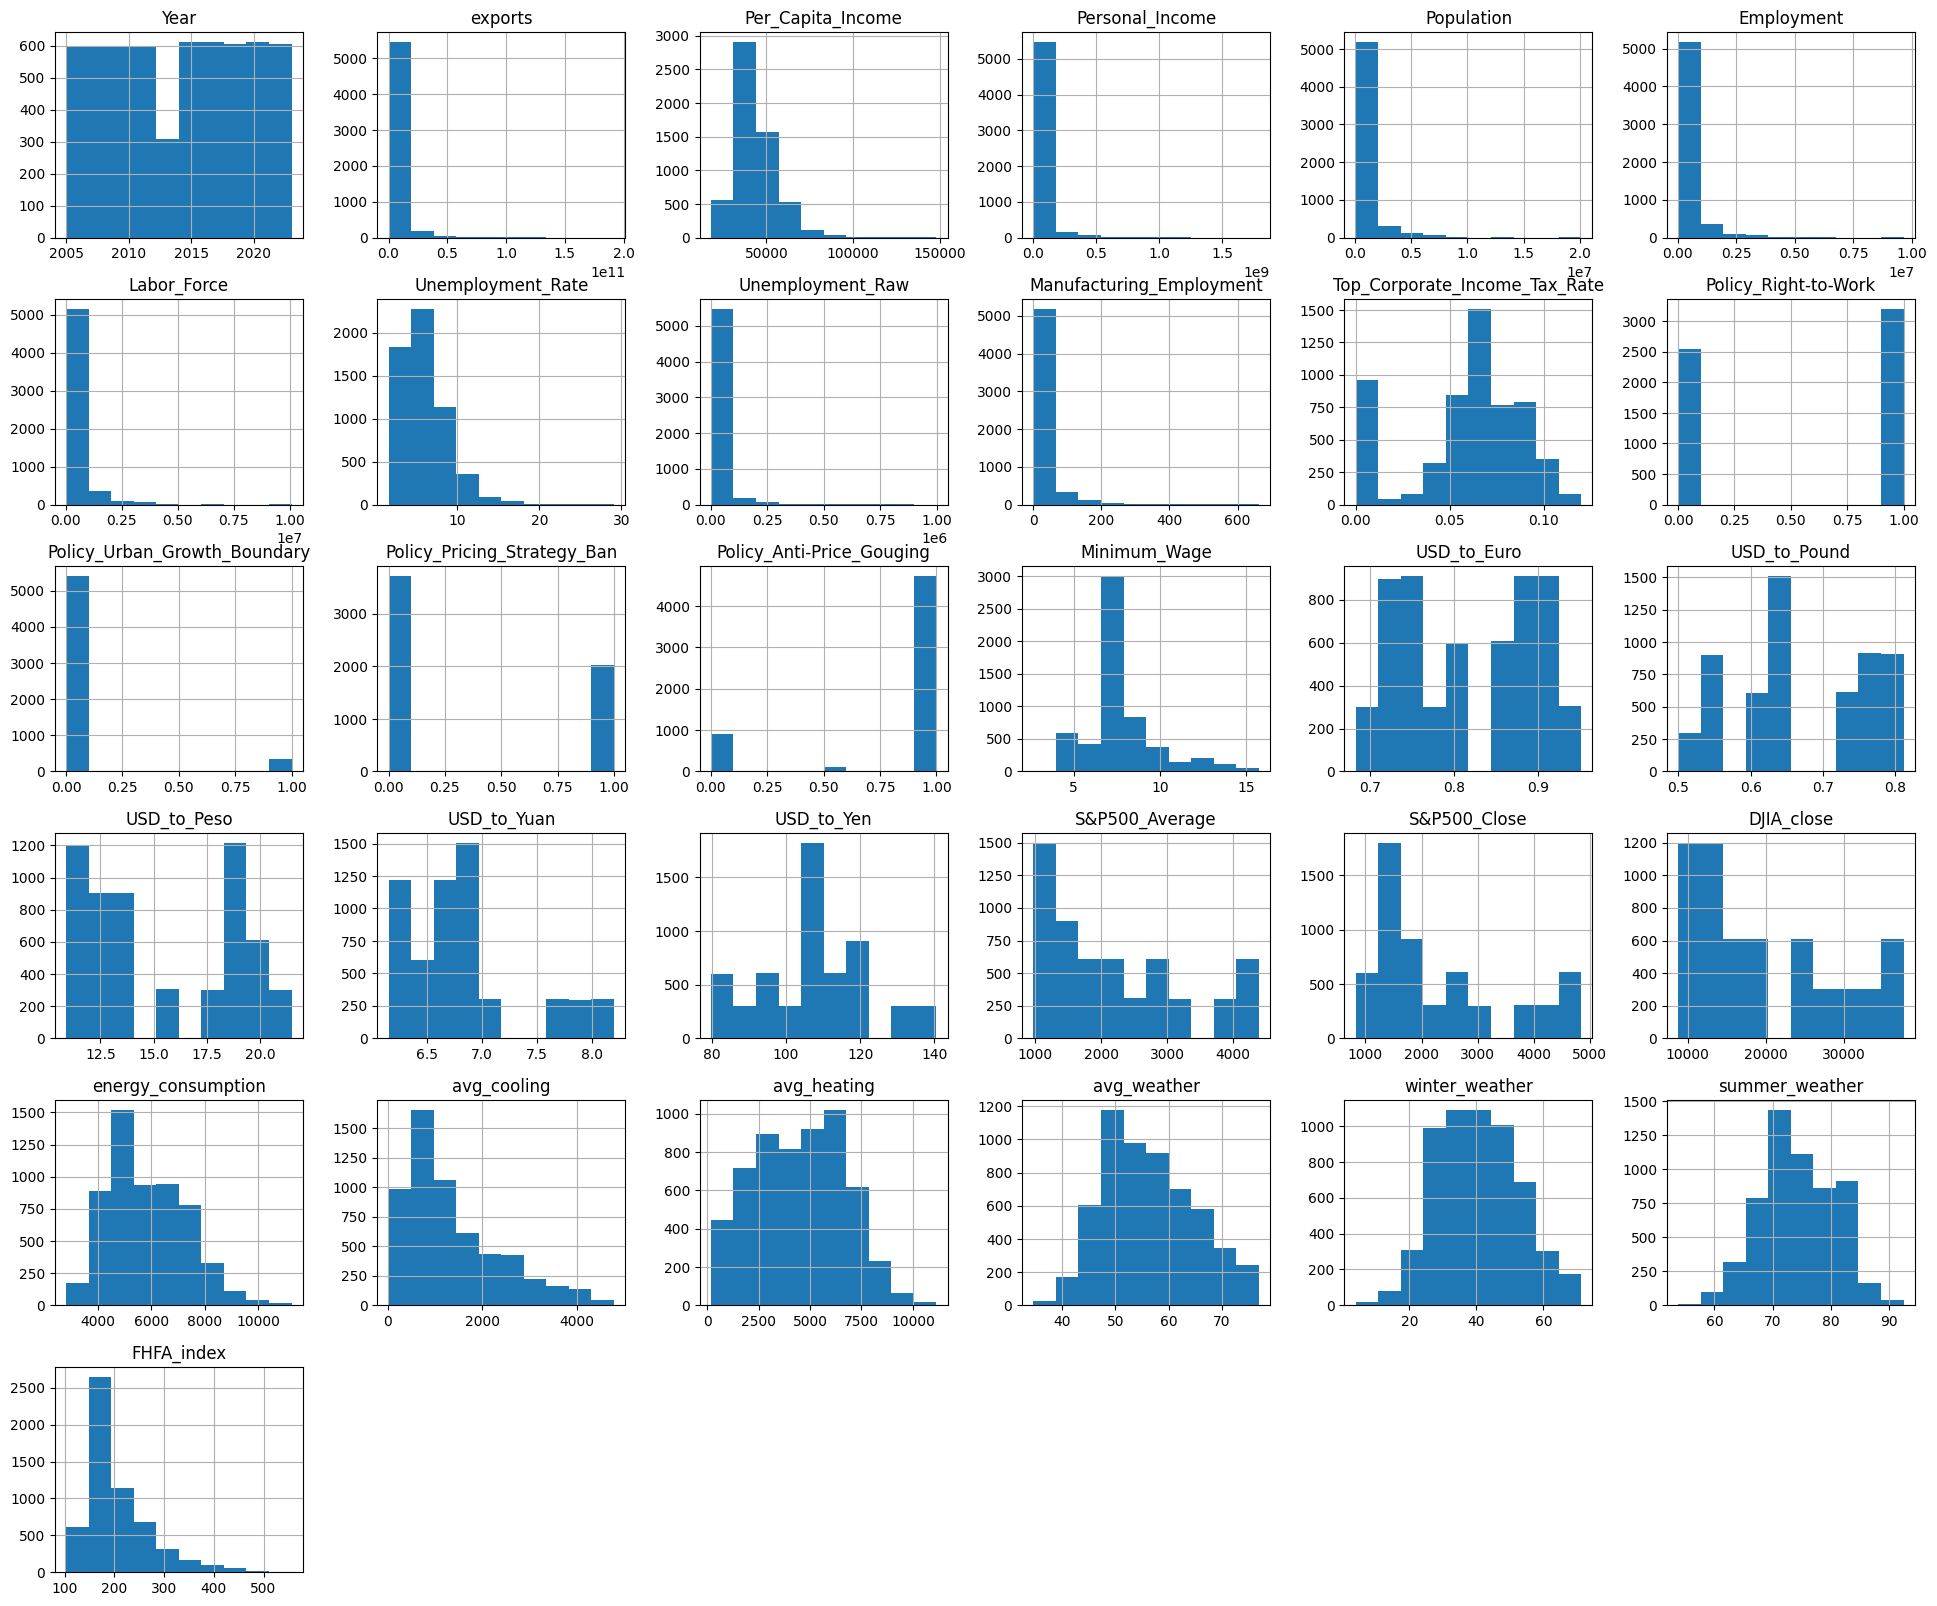

In [26]:
metro_exports_all_features.hist(figsize = (24,20))
plt.show()

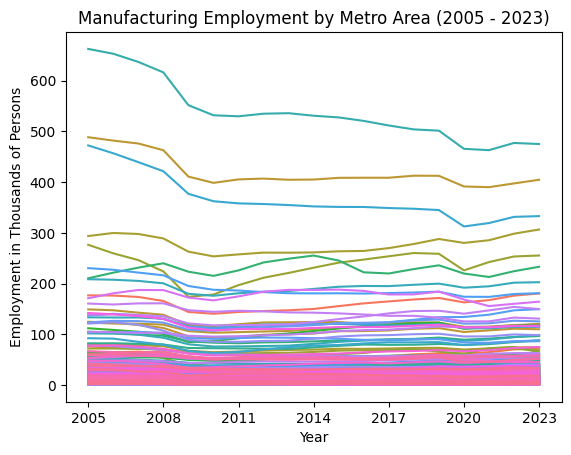

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "Manufacturing_Employment", hue = "MSA", data = metro_exports_all_features, legend = False)
ax.set(title = "Manufacturing Employment by Metro Area (2005 - 2023)", ylabel = "Employment in Thousands of Persons", xticks = year_ticks)
plt.show()

Is our general employment or population metric a good proxy for Manufacturing Employment? It appears not quite. While population and employment do appear to be good proxies for each other, Manufacturing Employment does not necessarily have a straight-forward linear relationship.

In [28]:
metro_exports_all_features.plot(kind = "scatter", x = "Manufacturing_Employment", y = "Employment")
plt.show()

In [29]:
metro_exports_all_features.plot(kind = "scatter", x = "Manufacturing_Employment", y = "Population")
plt.show()

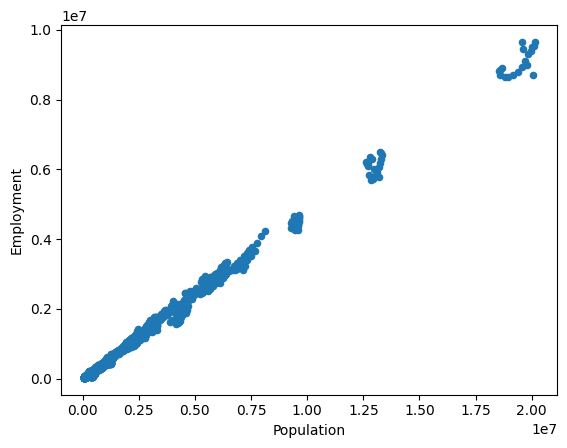

In [30]:
metro_exports_all_features.plot(kind = "scatter", x = "Population", y = "Employment")
plt.show()

Of course, the big question that we want to know is whether Manufacturing Employment is related to export volumes. It does seem that there is a positive relationship, but not particularly strong one. The MSAs with the highest levels of manufacturing employment appear to have only slightly above average export volumes, while the highest exporters have moderate levels of manufacturing employment.

<Axes: xlabel='Manufacturing_Employment', ylabel='exports'>

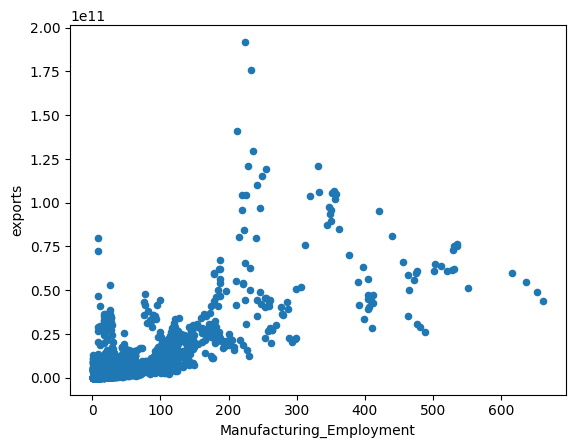

In [31]:
metro_exports_all_features.plot(kind = "scatter", x = "Manufacturing_Employment", y = "exports")

In [32]:
sns.lmplot(x = "Manufacturing_Employment", y = "exports", data = metro_exports_all_features)
plt.show()

What happens, however, when we consider the log of exports? Now, we can see a stronger relationship that looks closer to a diminishing returns scenario. 

In [33]:
metro_exports_all_features["log_exports"] = np.log(metro_exports_all_features["exports"])

In [34]:
metro_exports_all_features.plot(kind = "scatter", x = "Manufacturing_Employment", y = "log_exports")

<Axes: xlabel='Manufacturing_Employment', ylabel='log_exports'>

In [35]:
sns.regplot(x = "Manufacturing_Employment", y = "log_exports", data = metro_exports_all_features, logx = True, color = "red")
sns.scatterplot(x = "Manufacturing_Employment", y = "log_exports", data = metro_exports_all_features)
plt.show()

Before jumping to include Manufacturing Employment, we should consider whether this relationship might be due to the relationship between population and exports, since we know there is some moderate relationship between the two. 

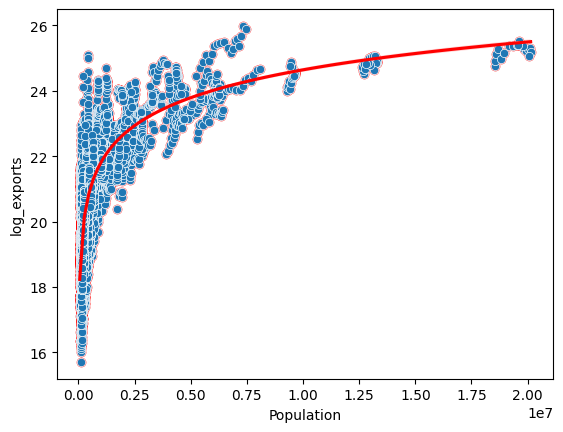

In [36]:
sns.regplot(x = "Population", y = "log_exports", data = metro_exports_all_features, logx = True, color = "red")
sns.scatterplot(x = "Population", y = "log_exports", data = metro_exports_all_features)
plt.show()

## Correlation Matrix
Now, we will turn to review the correlation matrix for `metro_exports_all_rows` to identify the Pearson Correlation Coefficient between our output variable `exports` and our features. The strongest correlations are with the three BEA variables: population, personal_income, and per_capita_income. Next, housing prices, then some of the weather (with winter and average weather having positive correlations and energy consumption and heating days have negative correlations) and minimum wage and corporate taxes. Somewhat surprisingly, the exchange rates do not seem to have a strong correlation. (Since personal income is just per capita income multiplied by the population--so it is directly correlated with population--it would make more sense to include both population and per capita income without personal income in a model.)

In [37]:
metro_exports_all_rows.corr(numeric_only = True)["exports"].sort_values(ascending = False)

exports                          1.000000
Population                       0.815368
Personal_Income                  0.806143
log_exports                      0.607167
Per_Capita_Income                0.259809
FHFA_index                       0.168055
winter_weather                   0.084887
avg_weather                      0.083484
Minimum_Wage                     0.075682
avg_cooling                      0.068338
Year                             0.056261
S&P500_Average                   0.051326
DJIA_close                       0.050018
S&P500_Close                     0.049469
USD_to_Pound                     0.046941
summer_weather                   0.044612
USD_to_Peso                      0.040997
USD_to_Euro                      0.036621
Policy_Anti-Price_Gouging        0.034849
USD_to_Yen                       0.024156
Policy_Urban_Growth_Boundary     0.018193
Unemployment_Rate               -0.001890
Policy_Pricing_Strategy_Ban     -0.025801
USD_to_Yuan                     -0

When examining the `metro_exports_all_features` correlation matrix, we see at the top are all of the variables that are directly a function of population--including the Labor_Force, Personal_income, Manufacturing_Employment, and Unemployment_Raw. Beyond this, the ranks are almost identical and values are very similar, which is to be expected since this is just a subset of the `all_rows` data with some additional columns. 

In [38]:
metro_exports_all_features.corr(numeric_only = True)["exports"].sort_values(ascending = False)

exports                          1.000000
Population                       0.810861
Labor_Force                      0.807309
Employment                       0.807254
Personal_Income                  0.801536
Manufacturing_Employment         0.778079
Unemployment_Raw                 0.739000
log_exports                      0.622847
Per_Capita_Income                0.261577
FHFA_index                       0.173842
avg_weather                      0.094738
winter_weather                   0.094297
avg_cooling                      0.079794
Minimum_Wage                     0.073871
Year                             0.064809
S&P500_Average                   0.058832
DJIA_close                       0.057619
S&P500_Close                     0.056789
summer_weather                   0.055535
USD_to_Pound                     0.054648
USD_to_Peso                      0.048926
USD_to_Euro                      0.043330
Policy_Anti-Price_Gouging        0.035814
USD_to_Yen                       0

As we now consider which features to include, we'll graph again some of the features with the highest correlation to exports, but this time using the `metro_exports_all_features` dataset.

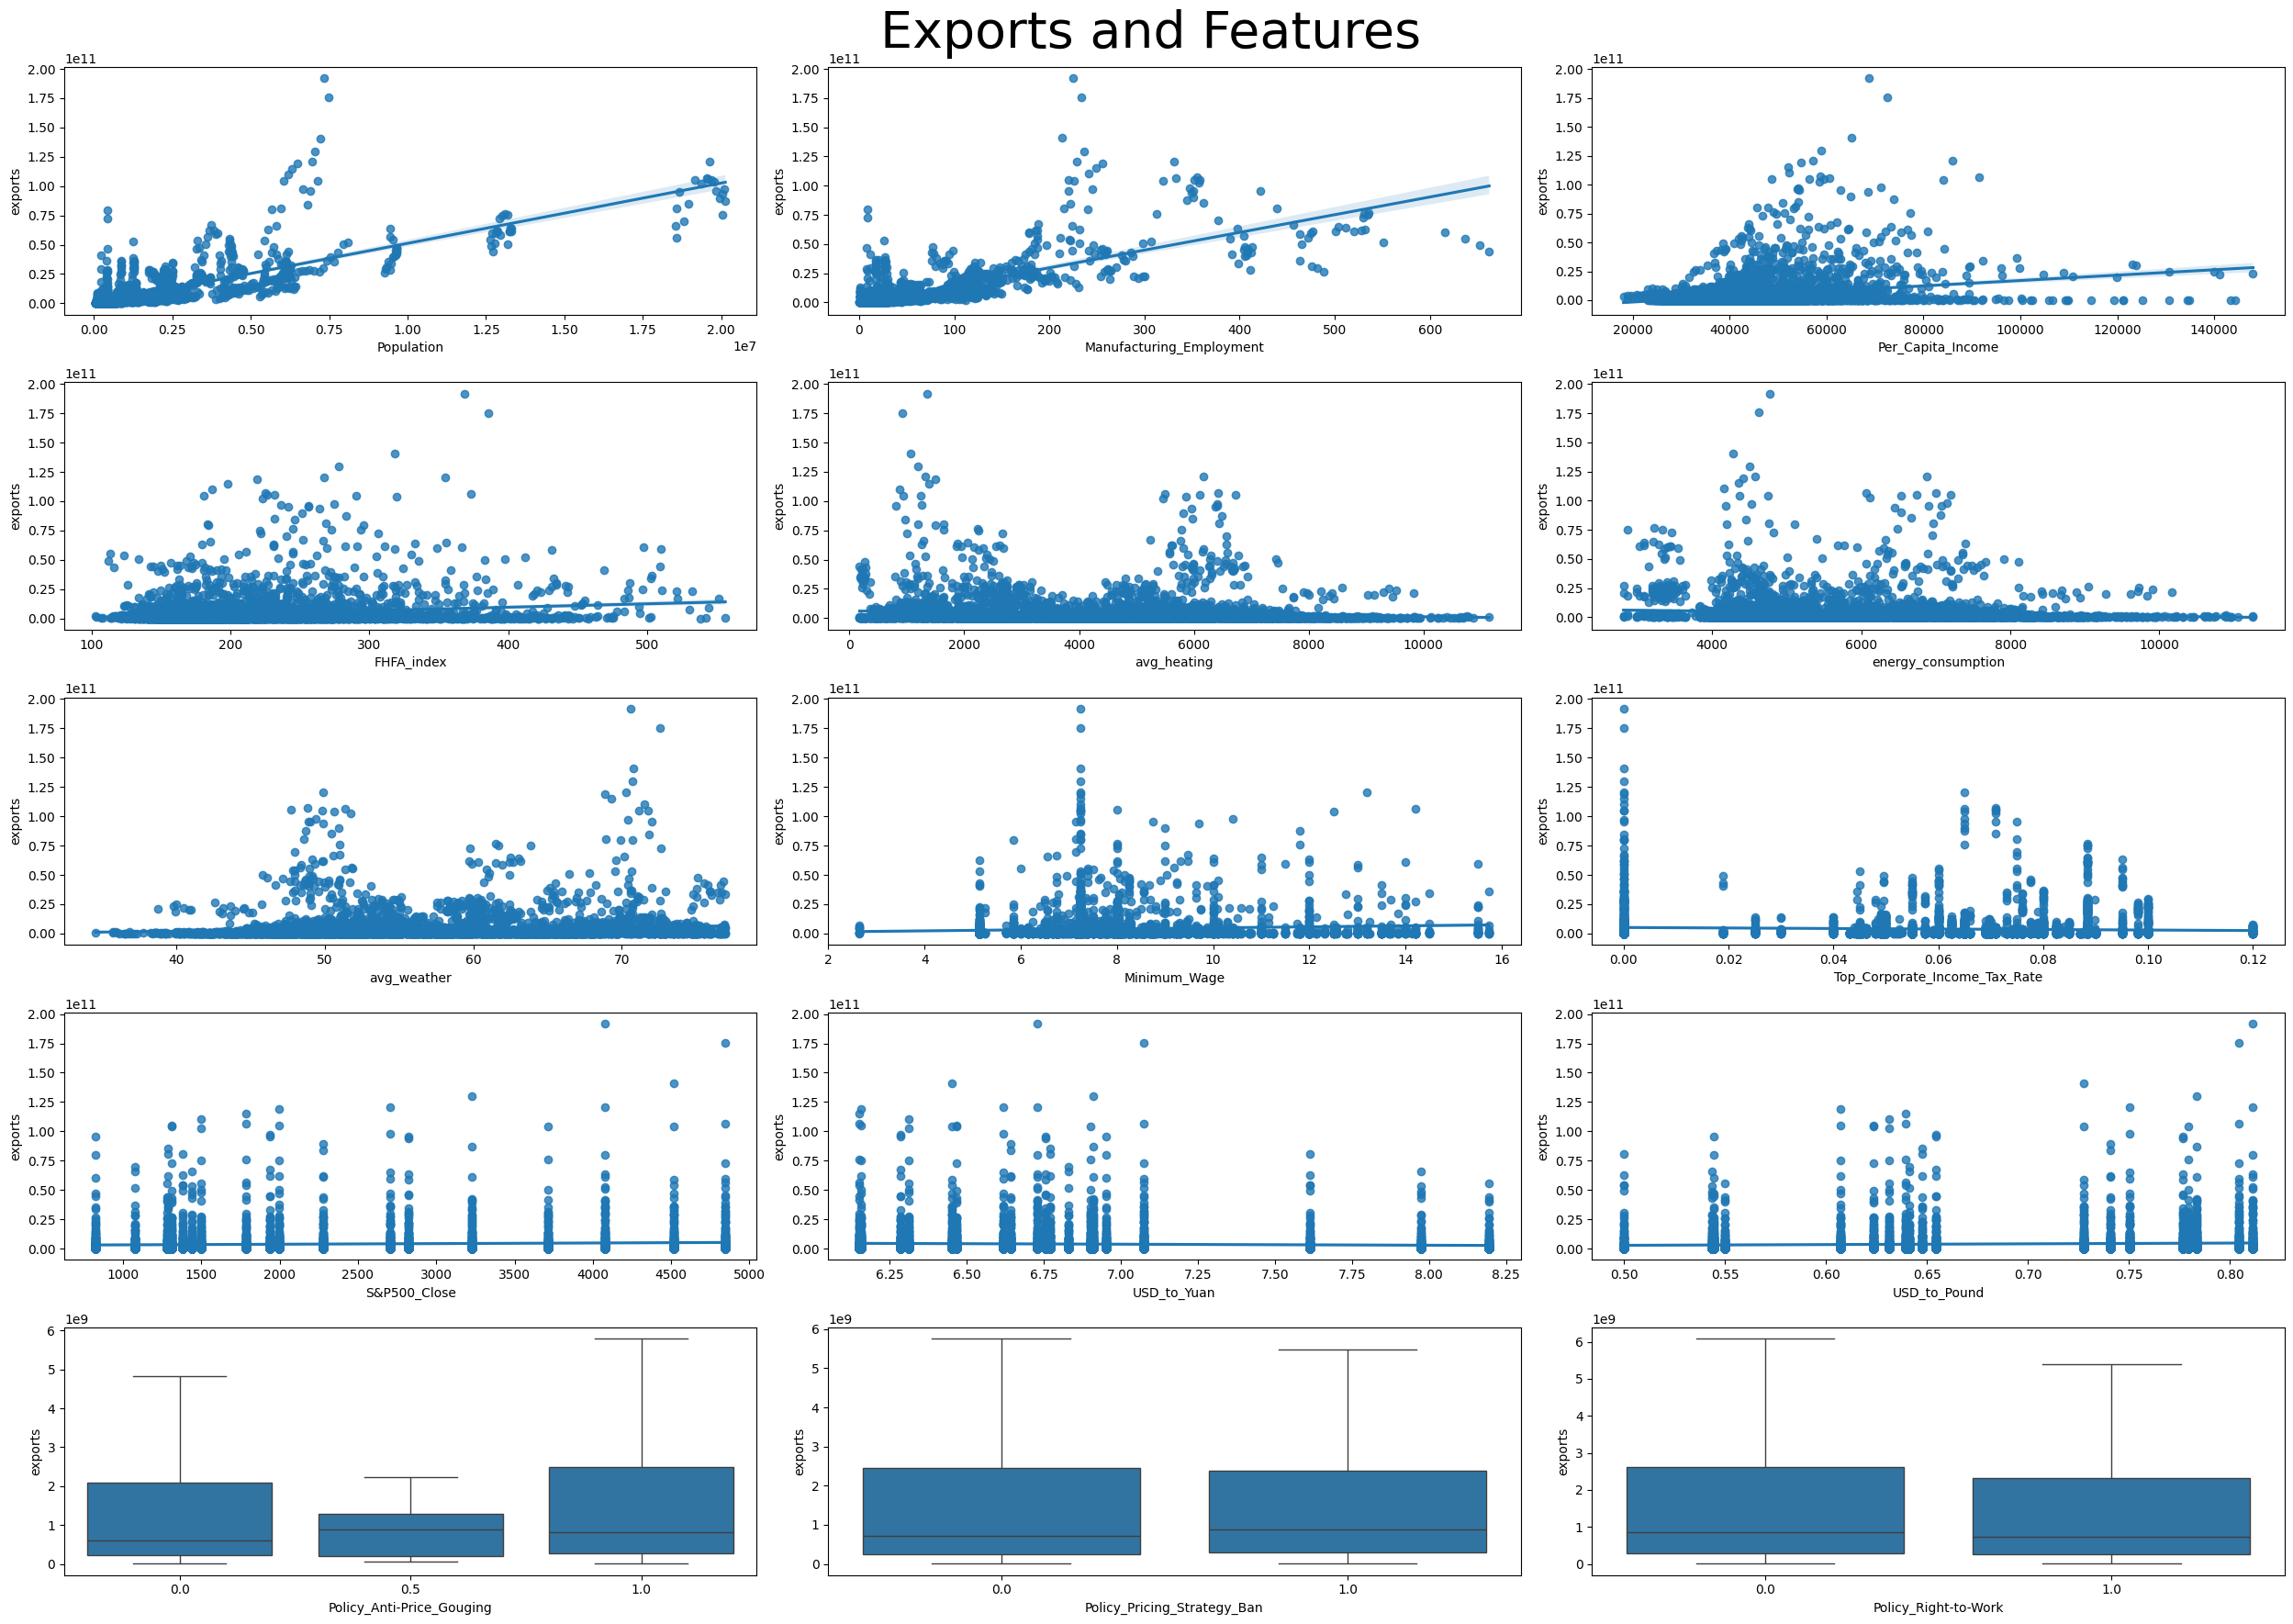

In [39]:
fig, ax = plt.subplots(5, 3, figsize=(25, 18))
sns.regplot(x="Population", y="exports", data = metro_exports_all_features, ax = ax[0, 0])

sns.regplot(x="Manufacturing_Employment", y="exports", data = metro_exports_all_features, ax = ax[0, 1])

sns.regplot(x="Per_Capita_Income", y="exports", data = metro_exports_all_features, ax = ax[0, 2])

sns.regplot(x="FHFA_index", y="exports", data = metro_exports_all_features, ax = ax[1, 0])

sns.regplot(x="avg_heating", y="exports", data = metro_exports_all_features, ax = ax[1, 1])

sns.regplot(x="energy_consumption", y="exports", data = metro_exports_all_features, ax = ax[1, 2])

sns.regplot(x="avg_weather", y="exports", data = metro_exports_all_features, ax = ax[2, 0])

sns.regplot(x="Minimum_Wage", y="exports", data = metro_exports_all_features, ax = ax[2, 1])

sns.regplot(x="Top_Corporate_Income_Tax_Rate", y="exports", data = metro_exports_all_features, ax = ax[2, 2])

sns.regplot(x="S&P500_Close", y="exports", data = metro_exports_all_features, ax = ax[3, 0])

sns.regplot(x="USD_to_Yuan", y="exports", data = metro_exports_all_features, ax = ax[3, 1])

sns.regplot(x="USD_to_Pound", y="exports", data = metro_exports_all_features, ax = ax[3, 2])

sns.boxplot(x = "Policy_Anti-Price_Gouging", y = "exports", data = metro_exports_all_features, showfliers = False, ax = ax[4, 0])

sns.boxplot(x = "Policy_Pricing_Strategy_Ban", y = "exports", data = metro_exports_all_features, showfliers = False, ax = ax[4, 1])

sns.boxplot(x = "Policy_Right-to-Work", y = "exports", data = metro_exports_all_features, showfliers = False, ax = ax[4, 2])

fig.suptitle('Exports and Features', fontsize=40)
plt.tight_layout()
plt.show()

We can clearly see a positive relationship between population, manufacturing_employment, and per_capita_income and exports. Average weather also appears to have a visible positive relationship and perhaps the FHFA_index too, while the corporate tax rate appears to have a negative relationship. The remaining variables do not have visibly discernable relationships.

Based on the analysis, in our final model we will use:
* Per_Capita Income
* Population
* Manufacturing_Employment
* Top_Corporate_Income_Tax_Rate
* FHFA_index
* avg_weather
* energy_consumption
* Minimum_Wage
* S&P500_Close

Because I am opting to use Manufacturing_Employment, we will pull this information from the `metro_exports_all_features` dataframe.

In [40]:
exports_data = metro_exports_all_features[["exports", "log_exports", "Year", "MSA", "Per_Capita_Income", "Population", 
                                           "Manufacturing_Employment", "Top_Corporate_Income_Tax_Rate", "FHFA_index",
                                           "avg_weather", "energy_consumption", "Minimum_Wage", "S&P500_Close"]]

In [41]:
exports_data.to_csv("exports_data_final.csv", index = False)